In [2]:
using NAJ, CairoMakie, LaTeXStrings, LinearAlgebra

In [97]:
function linear_shooting(
    p::Function, 
    q::Function, 
    r::Function, 
    boundary,             # t_i, t_f
    condition,            # x(t_i), x(t_f)
    Npoints = 100)        
    
    @assert length(boundary) == length(condition) == 2
    
    de1(t, x) = [0 1 0 ; q(t) p(t) r(t);  0 0 0] * x
    de2(t, x) = [0 1; q(t) p(t)] * x

    t = range(boundary[1], boundary[2], length = Npoints)

    α, β = condition[1:2]

    tn, x1 = ode_rk4(de1, boundary[1], [α, 0, 1], Npoints, step(t))
    tn, x2 = ode_rk4(de2, boundary[1], [0, 1], Npoints, step(t))
    
    r = @. x1[1, :] + (β-x1[1, end])/(x2[1, end]) * x2[1, :]

    return tn, r
end

function ode_finite_difference_linear(p::Function, q::Function, r::Function, boundary, condition, Npoints=100)
    @assert Npoints > 3
    t0 = range(boundary[1], boundary[2], length = Npoints)
    t = t0[2:end-1]
    h = step(t)

    u = @. -1 + (h/2) * p(t[1:end-1])
    d = @. -1 - (h/2) * p(t[2:end])
    dd = @. 2 + (h^2)*q(t)
    A = Tridiagonal(d, dd, u)

    b = @. -h^2 * r(t)
    b[1] = b[1] + (1+h/2*p(t[1]))*condition[1]
    b[end] = b[end] + (1-h/2*p(t[end])) * condition[2]

    return t0, Array([condition[1] (A\b)' condition[2]][1, :])

end

ode_finite_difference_linear (generic function with 2 methods)

In [98]:
tt, b = ode_finite_difference_linear(x->-2/x, x->2/(x^2), x-> sin(log(x))/(x^2), [1, 2], [1, 2], 100)

(1.0:0.010101010101010102:2.0, [1.0, 1.0092773212574697, 1.0185717851444127, 1.0278836884798501, 1.037213294806504, 1.0465608367631252, 1.0559265182859197, 1.0653105166523542, 1.0747129843794927, 1.0841340509879966  …  1.9035307754530038, 1.914208920120897, 1.9248974650118365, 1.935596307582248, 1.946305346310697, 1.9570244806931794, 1.9677536112380463, 1.9784926394605933, 1.9892414678773358, 2.0])

In [100]:
t, r = linear_shooting(x->-2/x, x->2/(x^2), x-> sin(log(x))/(x^2), [1, 2], [1, 2])

([1.0, 1.0101010101010102, 1.02020202020202, 1.0303030303030303, 1.0404040404040404, 1.0505050505050506, 1.0606060606060606, 1.0707070707070707, 1.0808080808080809, 1.0909090909090908  …  1.9090909090909092, 1.9191919191919191, 1.9292929292929295, 1.9393939393939394, 1.9494949494949496, 1.9595959595959598, 1.9696969696969697, 1.97979797979798, 1.98989898989899, 2.0], [1.0, 1.0092773615294333, 1.018571862981345, 1.0278838013304152, 1.03721344026517, 1.0465610125610108, 1.055926722282286, 1.065310746826689, 1.0747132388241452, 1.0841343279013147  …  1.903530853797335, 1.9142089897470174, 1.9248975259201075, 1.9355963597743961, 1.9463053897897464, 1.957024515463388, 1.967753637304844, 1.9784926568305239, 1.9892414765579995, 2.0])

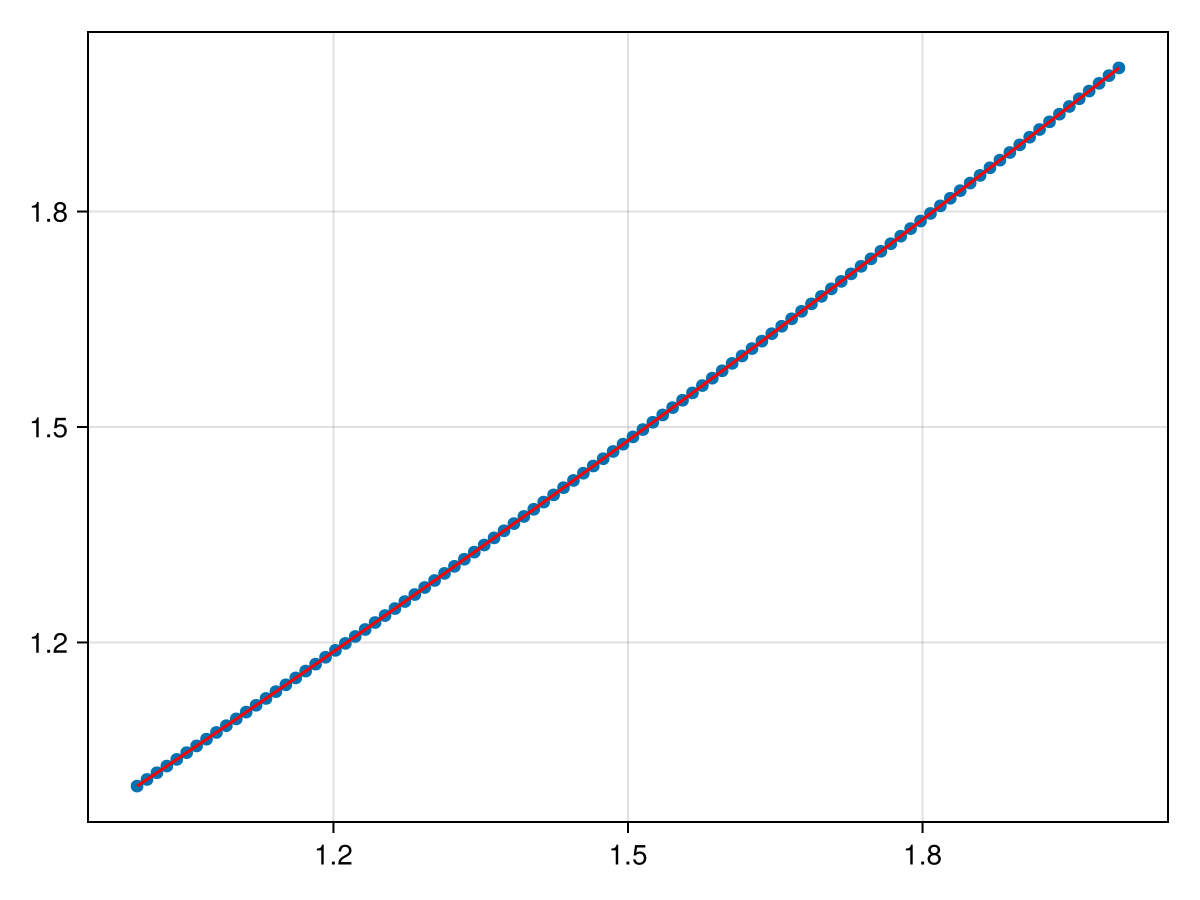

In [101]:
fig, ax = plot(t, r)
lines!(ax, tt, b, color=:red )
fig


In [102]:
t

100-element Vector{Float64}:
 1.0
 1.0101010101010102
 1.02020202020202
 1.0303030303030303
 1.0404040404040404
 1.0505050505050506
 1.0606060606060606
 1.0707070707070707
 1.0808080808080809
 1.0909090909090908
 ⋮
 1.9191919191919191
 1.9292929292929295
 1.9393939393939394
 1.9494949494949496
 1.9595959595959598
 1.9696969696969697
 1.97979797979798
 1.98989898989899
 2.0

In [104]:
t, φ = linear_shooting(r->-2/r, r->0, r-> 0, [2, 10], [10, 0])
t2, φ2 = ode_finite_difference_linear(r->-2/r, r->0, r-> 0, [2, 10], [10, 0], 200)

(2.0:0.04020100502512563:10.0, [10.0, 9.753694581280781, 9.516908212560374, 9.289099526066332, 9.06976744186044, 8.858447488584446, 8.654708520179339, 8.458149779735647, 8.268398268398231, 8.085106382978683  …  0.09384775808133582, 0.08307372793354198, 0.07238883143743619, 0.06179196704428493, 0.05128205128205184, 0.04085801838610872, 0.030518819938962688, 0.020263424518743887, 0.01009081735620596, 0.0])

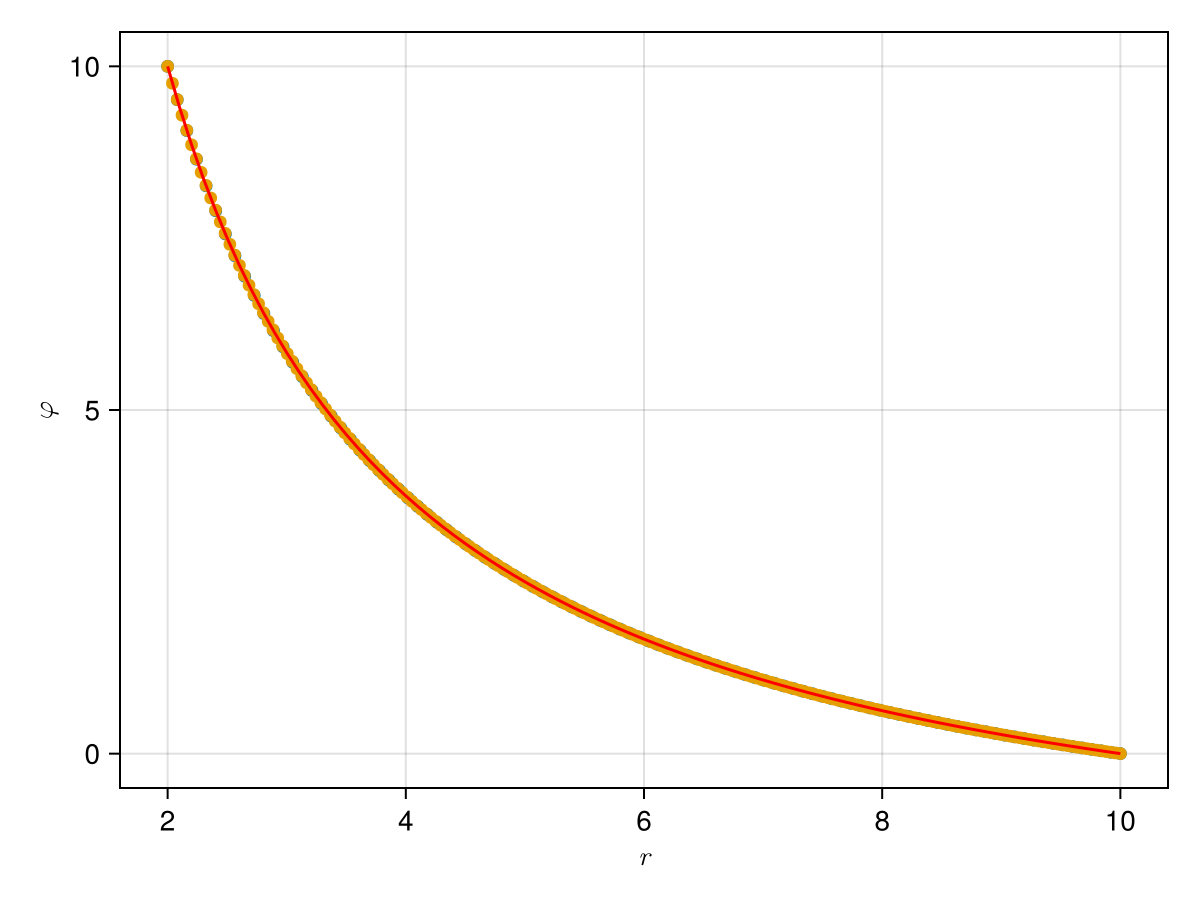

In [105]:
fig, ax= plot(t, φ, label = "Linear shooting")
scatter!(ax, t2, φ2)
t1 = 2.0:0.1:10
u = @. 10*2/t1 *(10-t1)/(8)
lines!(ax, t1, u, color = :red)
ax.xlabel = L"r"
ax.ylabel = L"\varphi"
fig

In [258]:
df1(t, x) = [1 (-t^2+1); 0 0] *x
t, r= ode_rk4(df1, 0, [0.5,  1], 11, 0.2)

([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0], [0.5 0.8292933333333334 … 4.815085694579433 5.305363000692653; 1.0 1.0 … 1.0 1.0])

In [259]:
r

2×11 Matrix{Float64}:
 0.5  0.829293  1.21408  1.64892  …  3.73234  4.28341  4.81509  5.30536
 1.0  1.0       1.0      1.0         1.0      1.0      1.0      1.0

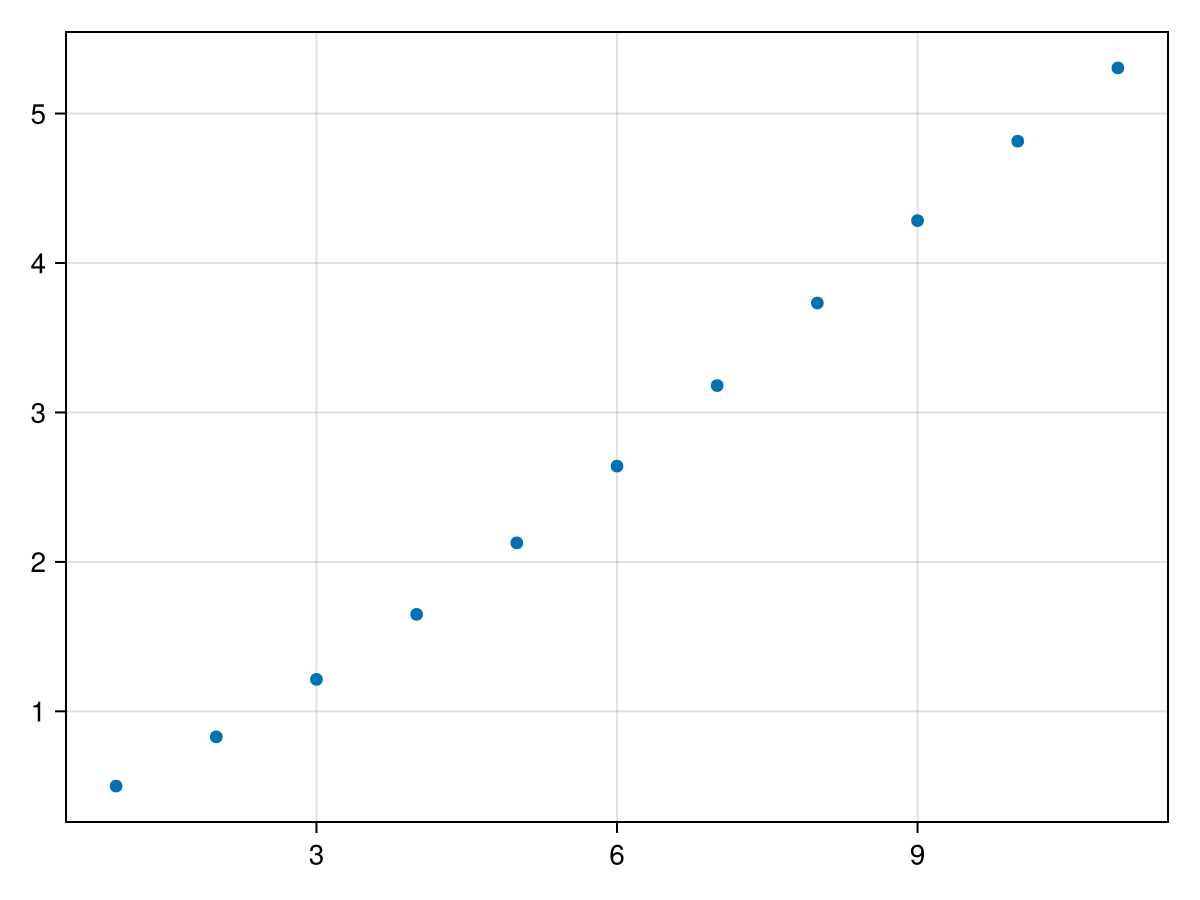

In [260]:
plot(r[1,:])

In [274]:
φ

3×99 Matrix{Float64}:
 10.0  10.0  10.0  10.0  10.0  10.0  …  10.0  10.0  10.0  10.0  10.0  10.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  1.0   1.0   1.0   1.0   1.0   1.0      1.0   1.0   1.0   1.0   1.0   1.0